In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
from operator import itemgetter

In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
input_data = df[["Mileage"]]
independent = df[["Price"]]

In [6]:
regression = linear_model.LinearRegression()
regression.fit(input_data, independent)
print("Linear Regression: y = {}x + {}".format(regression.coef_[0][0], regression.intercept_[0]))

Linear Regression: y = -0.17252050279124917x + 24764.55900606168


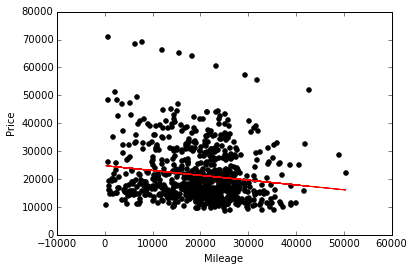

In [7]:
plt.scatter(input_data, independent, color='black')
plt.plot(input_data, regression.predict(input_data), color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [8]:
print("R-squared value = {}".format(regression.score(input_data, independent)))
print("This is a very poor fit, likely due to the band of higher values in the scatter")

R-squared value = 0.02046344732348948
This is a very poor fit, likely due to the band of higher values in the scatter


In [9]:
input_data = df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]]
independent = df[["Price"]]
regression = linear_model.LinearRegression()
regression.fit(input_data, independent)
print("R-squared value = {}".format(regression.score(input_data, independent)))
print("This fit is not very good as it has an R-squared value below 0.5")

R-squared value = 0.4462643536728379
This fit is not very good as it has an R-squared value below 0.5


In [10]:
def find_best(dataframe, dependent_var, independent_vars):
    choices = []
    for number in range(1, len(independent_vars)+1):
        combos = list(itertools.combinations(independent_vars, number))
        for combo in combos:
            combo = list(combo)
            input_data = dataframe[combo]
            dependent = dataframe[dependent_var]
            regression = linear_model.LinearRegression()
            regression.fit(input_data, dependent)
            choices.append((regression.score(input_data, dependent), combo, regression))
    best = sorted(choices, key=itemgetter(0), reverse=True)
    return best[0]

In [11]:
best = find_best(df, "Price", ["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"])

In [12]:
score = best[0]
print("R-squared value = {}".format(score))
print("""This fit is also not very good as it has an R-squared value below 0.5, but it is the best for combinations of these
factors.""")

R-squared value = 0.4462643536728379
This fit is also not very good as it has an R-squared value below 0.5, but it is the best for combinations of these
factors.


In [13]:
categories = df[["Make", "Model", "Trim", "Type"]]
dummies = pd.get_dummies(categories)
df2 = df[["Price", "Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]].join(dummies)

In [14]:
df2.head()
# Did not end up using this, but it is cool to be able to do.

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
from sklearn.preprocessing import LabelEncoder
def cat_to_num(dataframe, columns):
    df = dataframe.drop(columns, axis=1)
    for column in columns:
        le = LabelEncoder()
        df = df.join(pd.DataFrame(le.fit_transform(dataframe[column]), columns=[column]))
    return df

In [16]:
df3 = cat_to_num(df, ["Make", "Model", "Trim", "Type"])

In [17]:
independent_vars = list(df3.columns)
independent_vars.remove("Price")
best = find_best(df3, "Price", independent_vars)

In [18]:
score1 = best[0]
print("""The best fit has an R-squared of {} and uses
{} to predict 
Price.""".format(score1, best[1]))

The best fit has an R-squared of 0.5011334140890769 and uses
['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make', 'Model', 'Trim', 'Type'] to predict 
Price.
